In [1]:
with open("a280.tsp", "rt") as f:
    temp_list = f.read()

In [2]:
temp_list

'NAME : a280\nCOMMENT : drilling problem (Ludwig)\nTYPE : TSP\nDIMENSION: 280\nEDGE_WEIGHT_TYPE : EUC_2D\nNODE_COORD_SECTION\n  1 288 149\n  2 288 129\n  3 270 133\n  4 256 141\n  5 256 157\n  6 246 157\n  7 236 169\n  8 228 169\n  9 228 161\n 10 220 169\n 11 212 169\n 12 204 169\n 13 196 169\n 14 188 169\n 15 196 161\n 16 188 145\n 17 172 145\n 18 164 145\n 19 156 145\n 20 148 145\n 21 140 145\n 22 148 169\n 23 164 169\n 24 172 169\n 25 156 169\n 26 140 169\n 27 132 169\n 28 124 169\n 29 116 161\n 30 104 153\n 31 104 161\n 32 104 169\n 33  90 165\n 34  80 157\n 35  64 157\n 36  64 165\n 37  56 169\n 38  56 161\n 39  56 153\n 40  56 145\n 41  56 137\n 42  56 129\n 43  56 121\n 44  40 121\n 45  40 129\n 46  40 137\n 47  40 145\n 48  40 153\n 49  40 161\n 50  40 169\n 51  32 169\n 52  32 161\n 53  32 153\n 54  32 145\n 55  32 137\n 56  32 129\n 57  32 121\n 58  32 113\n 59  40 113\n 60  56 113\n 61  56 105\n 62  48  99\n 63  40  99\n 64  32  97\n 65  32  89\n 66  24  89\n 67  16  97\n 68

In [3]:
from tsp import TSP
from mst_2_approximation_tsp import mst_2_approximation_tsp
from held_karp import held_karp_optimized
from mst_2_approximation_tsp_novelty import mst_2_approximation_tsp_novelty

In [4]:
import matplotlib.pyplot as plt
import time

In [5]:
def measure_time(algo, tsp_file, size=None):
    tsp = TSP(tsp_file)
    if size is not None:
        used_nodes = tsp.node_coord_section[:size]
    else:
        used_nodes = tsp.node_coord_section
    if algo == "mst_2_approximation_tsp":
        st = time.time()
        tsp_tour, tsp_cost = mst_2_approximation_tsp(used_nodes)
        et = time.time()
    elif algo == "held_karp":
        st = time.time()
        tsp_tour, tsp_cost = held_karp_optimized(used_nodes)
        et = time.time()
    if algo == "mst_2_approximation_tsp_novelty":
        st = time.time()
        tsp_tour, tsp_cost = mst_2_approximation_tsp_novelty(used_nodes)
        et = time.time()
    return tsp_cost, tsp_tour, et-st


In [6]:
tsp_file_list = ["kz9976.tsp", "mona-lisa100K.tsp", "rw1621.tsp", "xqf131.tsp", "xql662.tsp", "a280.tsp"]
algorithm_list = ["mst_2_approximation_tsp", "held_karp", "mst_2_approximation_tsp_novelty"]
size_list = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]




In [7]:
def run_and_plot_experiments(tsp_files, algorithms, sizes):
    results = {} 

    for tsp_file in tsp_files:
        results[tsp_file] = {algo: {'costs': [], 'times': []} for algo in algorithms}
        
        for algo in algorithms:
            for size in sizes:
                cost, _, elapsed_time = measure_time(algo, tsp_file, size)
                
                results[tsp_file][algo]['costs'].append(cost)
                results[tsp_file][algo]['times'].append(elapsed_time)
    print(results)
    for tsp_file, file_results in results.items():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f"Performance Analysis on '{tsp_file}'", fontsize=16)

        for algo, data in file_results.items():
            ax1.plot(sizes, data['costs'], marker='o', linestyle='-', label=algo)
            ax2.plot(sizes, data['times'], marker='s', linestyle='--', label=algo)

        ax1.set_xlabel("Problem Size (Number of Nodes)")
        ax1.set_ylabel("Tour Cost")
        ax1.set_title("Cost vs. Problem Size")
        ax1.legend()
        ax1.grid(True)

        ax2.set_xlabel("Problem Size (Number of Nodes)")
        ax2.set_ylabel("Execution Time (seconds)")
        ax2.set_title("Time vs. Problem Size")

        ax2.set_yscale('log') 
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
        plt.show()

In [ ]:
tsp_file_list = ["a280.tsp"]
algorithm_list = ["mst_2_approximation_tsp", "held_karp", "mst_2_approximation_tsp_novelty"]
size_list = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

run_and_plot_experiments(tsp_file_list, algorithm_list, size_list)

In [ ]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import random
from tqdm import tqdm

def run_and_plot_benchmark_comparison(tsp_files, algorithms, optimized_costs):
    results = {algo: {'costs': [], 'times': []} for algo in algorithms}
    base_algo = algorithms[0]
    novelty_algo = algorithms[1]
    

    print("--- 벤치마크 테스트 시작 ---")
    for i, tsp_file in enumerate(tqdm(tsp_files, desc="Benchmarking")):
        for algo in algorithms:
            cost, _, elapsed_time = measure_time(algo, tsp_file)
            results[algo]['costs'].append(cost)
            results[algo]['times'].append(elapsed_time)
            

    relative_costs = [(n / b) * 100 if b > 0 else 0 for n, b in zip(results[novelty_algo]['costs'], results[base_algo]['costs'])]
    relative_times = [(n / b) * 100 if b > 0 else 0 for n, b in zip(results[novelty_algo]['times'], results[base_algo]['times'])]
    

    relative_optimized = [(o / b) * 100 if b > 0 else 0 for o, b in zip(optimized_costs, results[base_algo]['costs'])]


    x = np.arange(len(tsp_files))
    bar_width = 0.35
    

    fig1, ax1 = plt.subplots(figsize=(16, 8))
    

    base_bar_heights = [100] * len(tsp_files)
    
    bars1 = ax1.bar(x - bar_width/2, base_bar_heights, bar_width, label=f'{base_algo} (Baseline 100%)', color='gray')
    bars2 = ax1.bar(x + bar_width/2, relative_costs, bar_width, label=f'{novelty_algo} (Relative %)', color='cornflowerblue')
    ax1.plot(x, relative_optimized, color='red', marker='*', linestyle='--', zorder=5, label='Optimized Cost (Relative %)')


    for i in range(len(bars1)):

        ax1.text(bars1[i].get_x() + bars1[i].get_width() / 2, 100, f"{results[base_algo]['costs'][i]:.0f}",
                 ha='center', va='bottom', size=9, fontweight='bold')

        ax1.text(bars2[i].get_x() + bars2[i].get_width() / 2, relative_costs[i], f"{results[novelty_algo]['costs'][i]:.0f}",
                 ha='center', va='bottom', size=9, fontweight='bold')

    ax1.set_ylabel('Relative Cost Performance (%)')
    ax1.set_title('Relative Cost Comparison (Lower is Better)', fontsize=16)
    ax1.set_xticks(x)
    ax1.set_xticklabels(tsp_files, rotation=45, ha="right")
    ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100)) 
    ax1.axhline(100, color='gray', linestyle='--', alpha=0.7)
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.set_ylim(top=max(110, max(relative_costs) * 1.1))

    fig1.tight_layout()

    fig2, ax2 = plt.subplots(figsize=(16, 8))

    bars1_t = ax2.bar(x - bar_width/2, base_bar_heights, bar_width, label=f'{base_algo} (Baseline 100%)', color='gray')
    bars2_t = ax2.bar(x + bar_width/2, relative_times, bar_width, label=f'{novelty_algo} (Relative %)', color='seagreen')

    for i in range(len(bars1_t)):
        ax2.text(bars1_t[i].get_x() + bars1_t[i].get_width() / 2, 100, f"{results[base_algo]['times'][i]:.3f}s",
                 ha='center', va='bottom', size=9, fontweight='bold')
        ax2.text(bars2_t[i].get_x() + bars2_t[i].get_width() / 2, relative_times[i], f"{results[novelty_algo]['times'][i]:.3f}s",
                 ha='center', va='bottom', size=9, fontweight='bold')

    ax2.set_ylabel('Relative Time Performance (%)')
    ax2.set_title('Relative Execution Time Comparison (Lower is Better)', fontsize=16)
    ax2.set_xticks(x)
    ax2.set_xticklabels(tsp_files, rotation=45, ha="right")
    ax2.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))
    ax2.axhline(100, color='gray', linestyle='--', alpha=0.7)
    ax2.legend()
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.set_ylim(top=max(110, max(relative_times) * 1.1))

    fig2.tight_layout()

    plt.show()


In [9]:
tsp_file_list = ["xqf131.tsp", "xql662.tsp", "rw1621.tsp", "kz9976.tsp", "mona-lisa100K.tsp"]
algorithm_list = ["mst_2_approximation_tsp", "mst_2_approximation_tsp_novelty"]

optimized_cost_list = [564, 2513, 26051, 1061882, 5757191]

--- 벤치마크 테스트 시작 ---


Benchmarking:   0%|          | 0/5 [00:00<?, ?it/s]

Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 131/131 [00:00<00:00, 846.10it/s]


Total MST Cost: 478.1765487194061
Moving data to GPU and initializing for Prim's algorithm...


Benchmarking:  20%|██        | 1/5 [00:00<00:01,  2.12it/s]

Total MST Cost: 478.1765487194061
Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 662/662 [00:00<00:00, 1029.00it/s]


Total MST Cost: 2274.8660469055176
Moving data to GPU and initializing for Prim's algorithm...


Benchmarking:  40%|████      | 2/5 [00:01<00:03,  1.04s/it]

Total MST Cost: 2274.8660469055176
Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 1621/1621 [00:01<00:00, 1023.17it/s]


Total MST Cost: 22973.780788958073
Moving data to GPU and initializing for Prim's algorithm...


Benchmarking:  60%|██████    | 3/5 [00:05<00:04,  2.11s/it]

Total MST Cost: 22973.780788958073
Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 9976/9976 [00:10<00:00, 937.20it/s]


Total MST Cost: 939421.9957207441
Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 9976/9976 [00:11<00:00, 898.71it/s]


Total MST Cost: 939421.9957207441


Benchmarking:  80%|████████  | 4/5 [00:28<00:10, 10.53s/it]

Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 100000/100000 [02:47<00:00, 597.48it/s]


Total MST Cost: 5570220.144069672
Moving data to GPU and initializing for Prim's algorithm...


Building MST with Prim's: 100%|██████████| 100000/100000 [02:55<00:00, 570.47it/s]


Total MST Cost: 5570220.144069672


Benchmarking: 100%|██████████| 5/5 [07:13<00:00, 86.64s/it] 


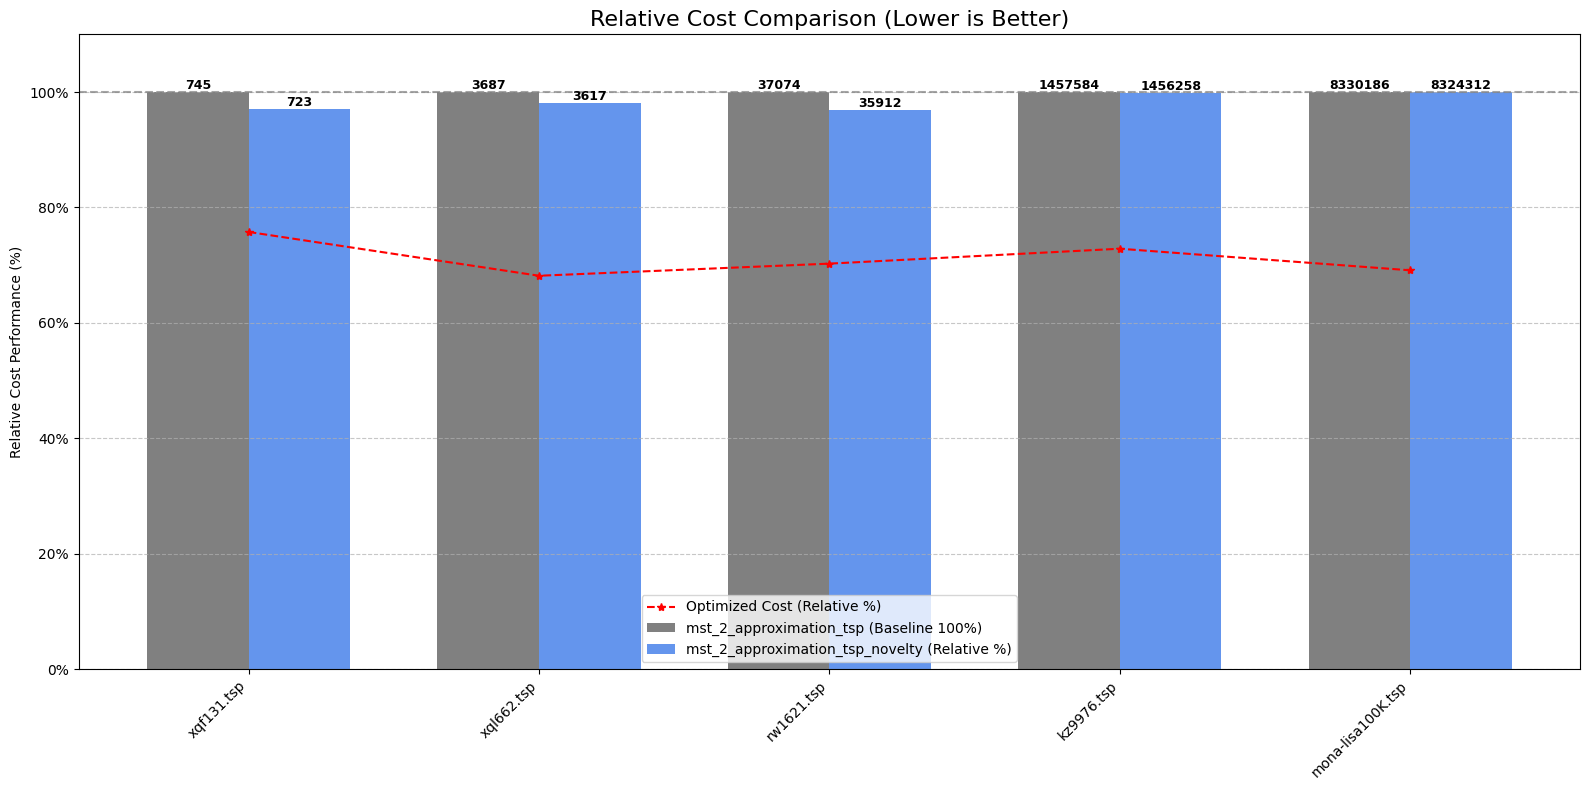

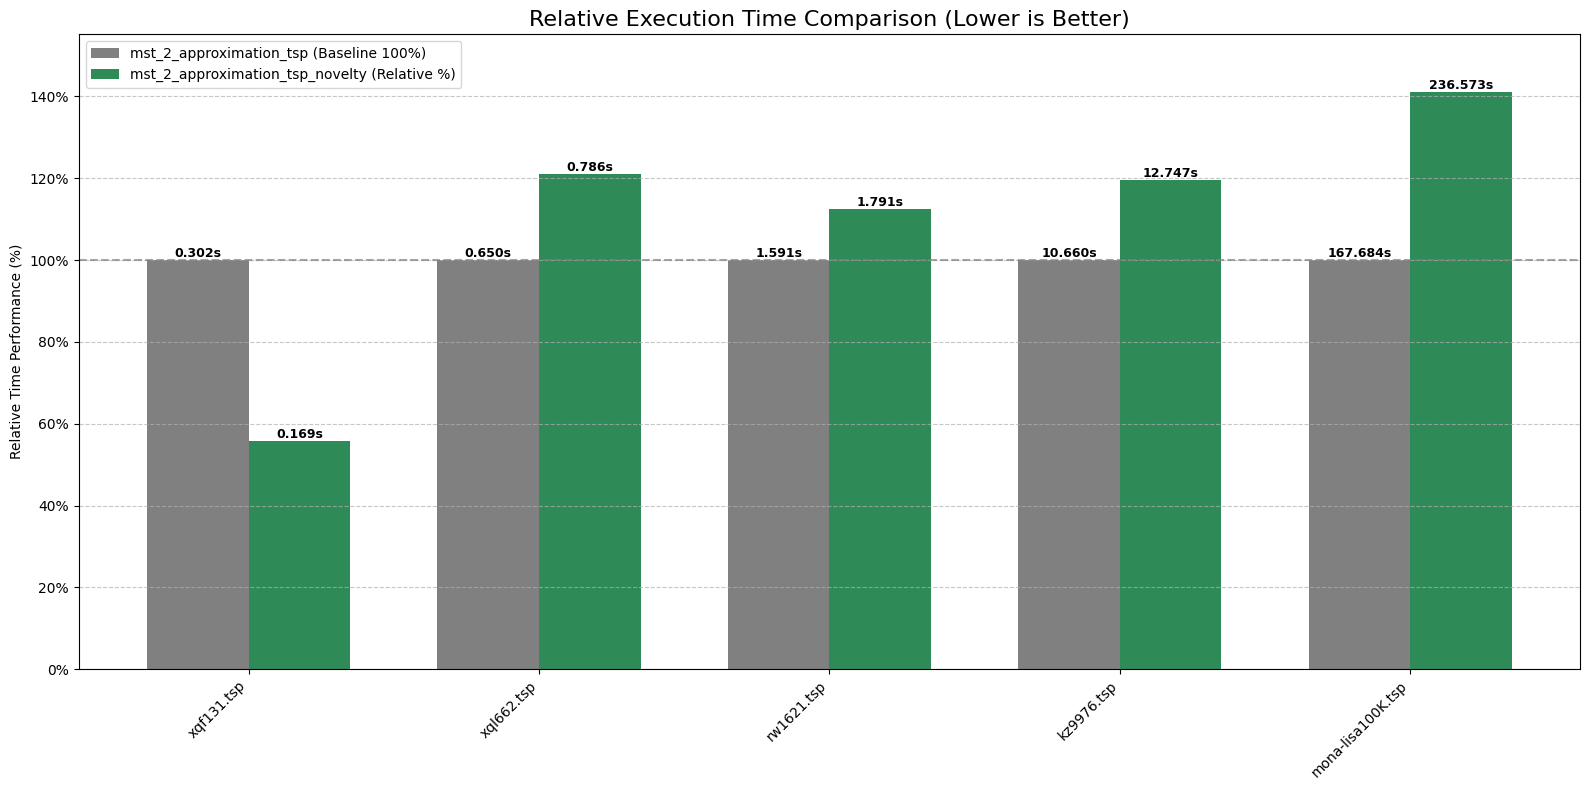

In [10]:
run_and_plot_benchmark_comparison(tsp_file_list, algorithm_list, optimized_cost_list)